In [1]:
import os
import random

import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
import mr

In [4]:
from mrcnn import model as modellib
from mrcnn import visualize

Using TensorFlow backend.


In [5]:
def get_ax(rows=1, cols=1, size=8):
    fig, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return fig, ax

In [41]:
work_path = os.path.join("E:", os.sep, "RCNNPipes512Valid")
os.chdir(work_path)

In [42]:
dataset = mr.MRDataset()
dataset.load(work_path)
dataset.prepare()

In [32]:
class InferenceConfig(mr.TrainConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    # DETECTION_MIN_CONFIDENCE = 0.9
    DETECTION_NMS_THRESHOLD = 0.2
    
inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference",
                          config=inference_config,
                          model_dir="logs")

find_last = True
if find_last:
    model_path = model.find_last()
    print("Loading weights from ", model_path)
else:
    model_path = "mask_rcnn_mr_0500.h5"
model.load_weights(model_path, by_name=True)

Loading weights from  logs\mr20190518T1148\mask_rcnn_mr_0300.h5
Re-starting from epoch 300


In [ ]:
inference_config.display()

In [33]:
fig_id = 1

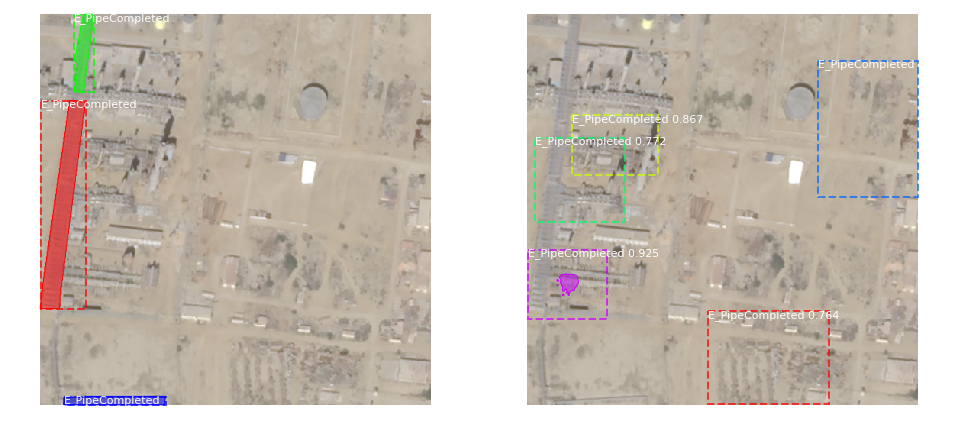

In [50]:
image_id = random.choice(dataset.image_ids)

original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, inference_config, 
                           image_id, use_mini_mask=False)

results = model.detect([original_image], verbose=0)
r = results[0]
fig, (ax1, ax2) = get_ax(1,2)
visualize.display_instances(original_image,
                            gt_bbox,
                            gt_mask,
                            gt_class_id, 
                            dataset.class_names,
                            ax=ax1)

visualize.display_instances(original_image,
                            r['rois'],
                            r['masks'],
                            r['class_ids'], 
                            dataset.class_names,
                            r['scores'],
                            ax=ax2)

In [18]:
fig.savefig(f"pipes-train-{fig_id:03d}.png")
fig_id += 1